**Import libraries**

In [131]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

**Mount the google drive**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Change directory**

In [103]:
os.chdir("/content/drive/My Drive/Deep_Learning Mini Project 01/")
os.getcwd()

'/content/drive/My Drive/Deep_Learning Mini Project 01'

**Load and display an image**

In [104]:
image = image.load_img("Letters/A/1.jpeg")

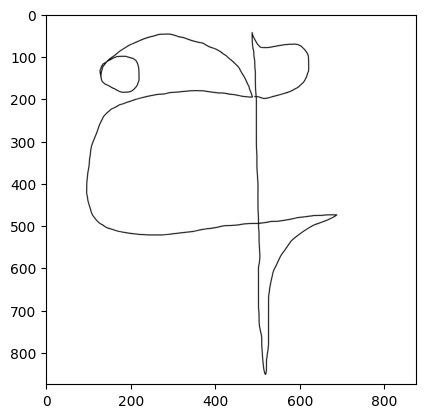

In [105]:
plt.imshow(image)

**Display the shape**

In [106]:
cv2.imread("Letters/A/1.jpeg").shape

(875, 875, 3)

**Rescaling the image**

In [107]:
train = ImageDataGenerator(rescale = 1/255)

In [108]:
validate = ImageDataGenerator(rescale = 1/255)

**Create the data set**

In [109]:
train_dataset = train.flow_from_directory('Letters/',
                                          target_size = (200,200),
                                          batch_size = 5,
                                          class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [110]:
validation_dataset = validate.flow_from_directory('Validate_Letters/',
                                                   target_size = (200,200),
                                                   batch_size = 5,
                                                   class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [111]:
train_dataset.class_indices

{'A': 0, 'Ta': 1}

In [112]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**CNN Architecture**

In [113]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer 32 filters, size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer 64 filters, size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer
                                    tf.keras.layers.Flatten(),
                                   # fully connected layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [114]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**Feed the network**

In [139]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 10,
                      epochs = 40,
                      validation_data = validation_dataset)

Epoch 1/40
10/10 [==============================] - 11s 1s/step - loss: 4.0118e-06 - accuracy: 1.0000 - val_loss: 3.0093e-06 - val_accuracy: 1.0000
Epoch 2/40
10/10 [==============================] - 11s 1s/step - loss: 2.7035e-06 - accuracy: 1.0000 - val_loss: 2.8544e-06 - val_accuracy: 1.0000
Epoch 3/40
10/10 [==============================] - 8s 833ms/step - loss: 3.1082e-06 - accuracy: 1.0000 - val_loss: 3.0400e-06 - val_accuracy: 1.0000
Epoch 4/40
10/10 [==============================] - 8s 812ms/step - loss: 3.4375e-06 - accuracy: 1.0000 - val_loss: 2.5591e-06 - val_accuracy: 1.0000
Epoch 5/40
10/10 [==============================] - 8s 857ms/step - loss: 2.1779e-06 - accuracy: 1.0000 - val_loss: 2.4801e-06 - val_accuracy: 1.0000
Epoch 6/40
10/10 [==============================] - 8s 814ms/step - loss: 2.3299e-06 - accuracy: 1.0000 - val_loss: 2.3742e-06 - val_accuracy: 1.0000
Epoch 7/40
10/10 [==============================] - 9s 959ms/step - loss: 2.4239e-06 - accuracy: 1.0000 

In [140]:
validation_dataset.class_indices

{'A': 0, 'Ta': 1}

**Test the model**

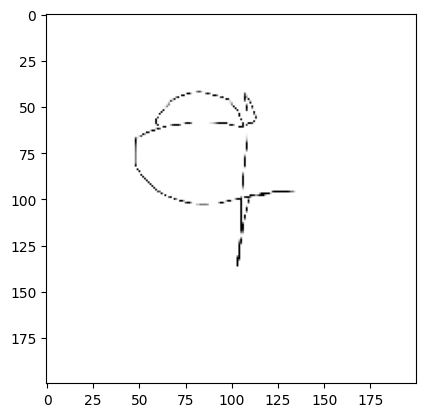

1/1 [==============================] - 0s 56ms/step
This is Letter 'අ' 


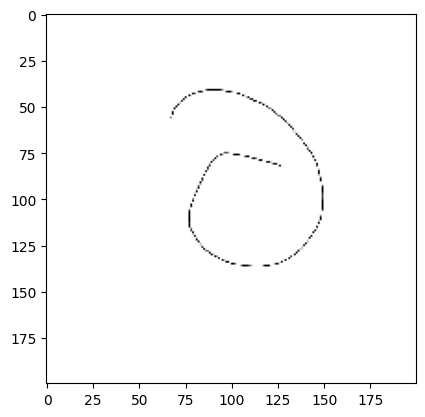

1/1 [==============================] - 0s 43ms/step
This is Letter 'ට'


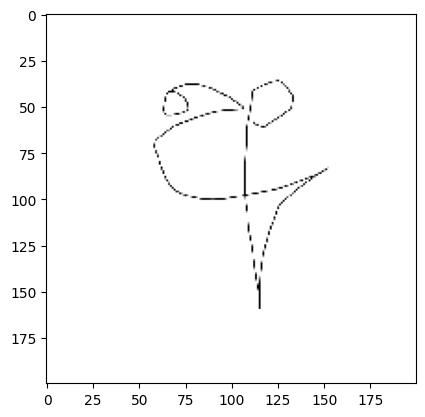

1/1 [==============================] - 0s 44ms/step
This is Letter 'අ' 


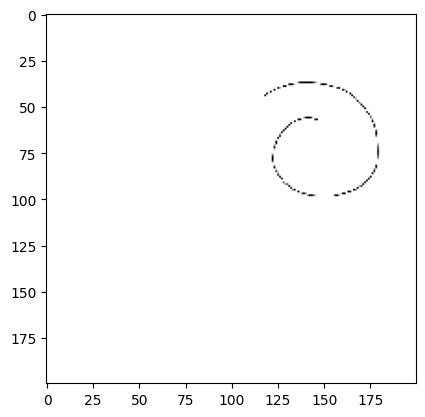

1/1 [==============================] - 0s 35ms/step
This is Letter 'ට'


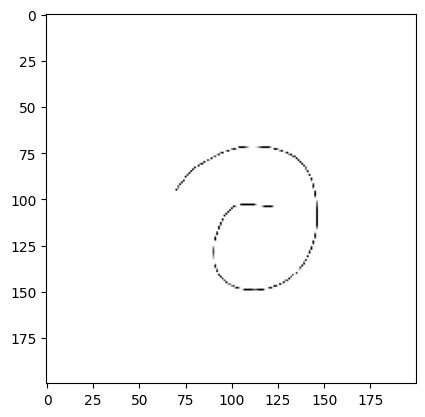

1/1 [==============================] - 0s 38ms/step
This is Letter 'ට'


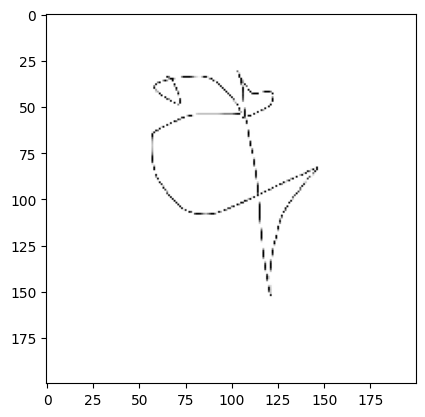

1/1 [==============================] - 0s 37ms/step
This is Letter 'අ' 


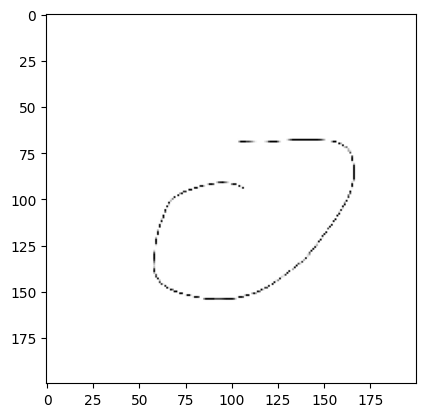

1/1 [==============================] - 0s 60ms/step
This is Letter 'ට'


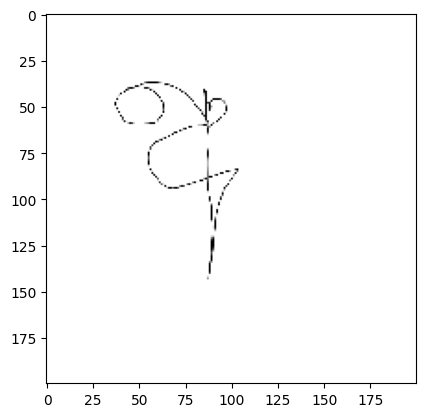

1/1 [==============================] - 0s 69ms/step
This is Letter 'අ' 


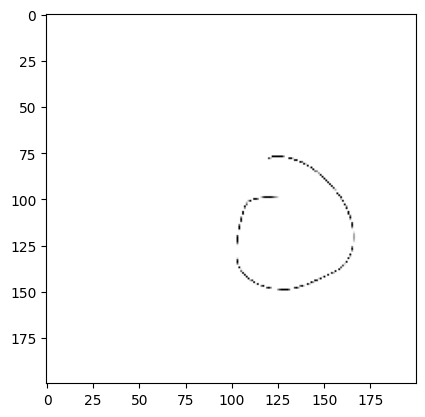

1/1 [==============================] - 0s 55ms/step
This is Letter 'ට'


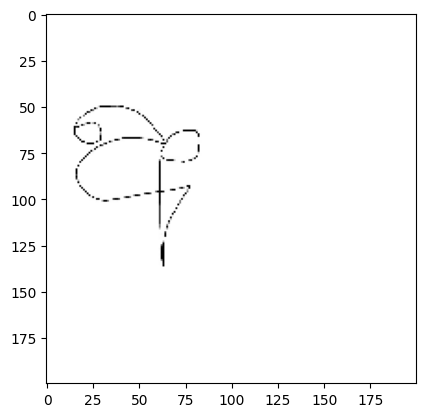

1/1 [==============================] - 0s 54ms/step
This is Letter 'අ' 


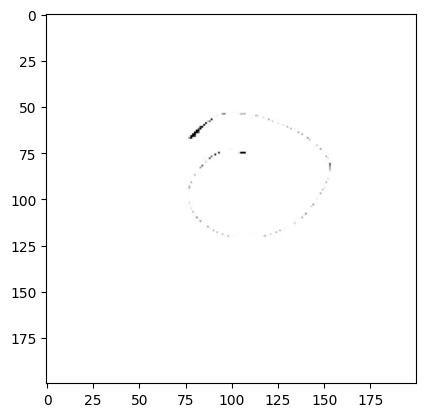

1/1 [==============================] - 0s 55ms/step
This is Letter 'ට'


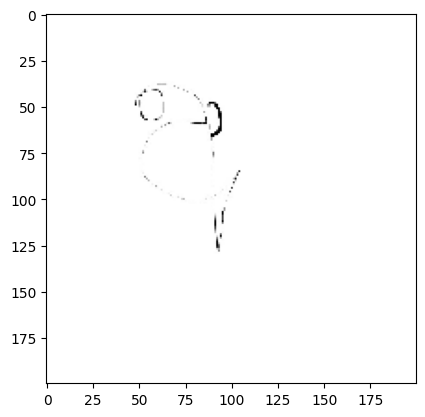

1/1 [==============================] - 0s 55ms/step
This is Letter 'අ' 


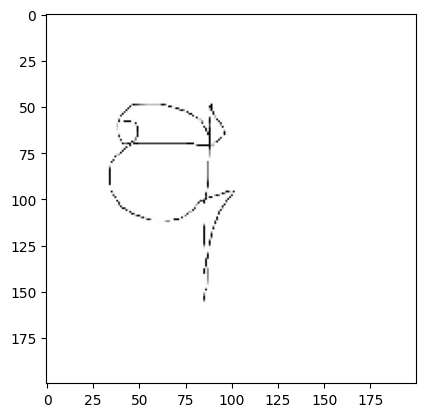

1/1 [==============================] - 0s 56ms/step
This is Letter 'අ' 


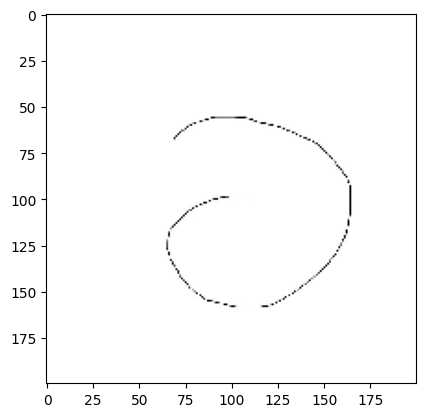

1/1 [==============================] - 0s 37ms/step
This is Letter 'ට'


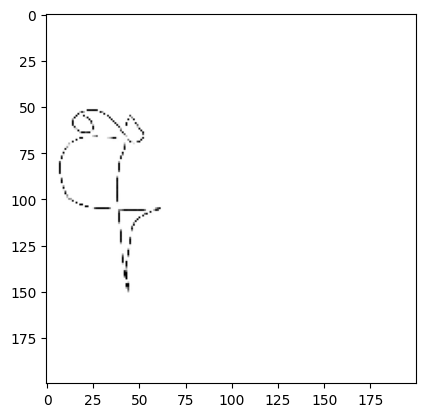

1/1 [==============================] - 0s 37ms/step
This is Letter 'අ' 


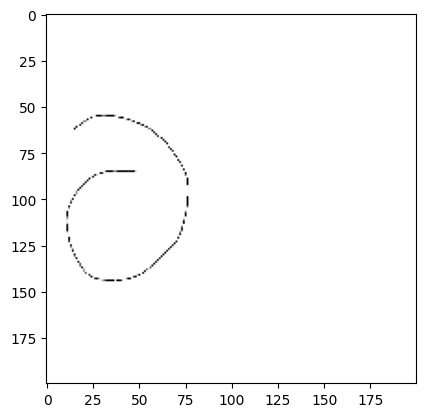

1/1 [==============================] - 0s 39ms/step
This is Letter 'ට'


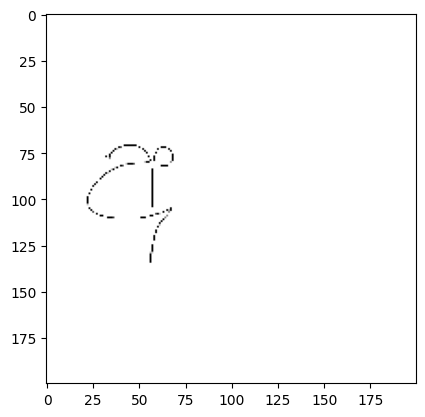

1/1 [==============================] - 0s 36ms/step
This is Letter 'අ' 


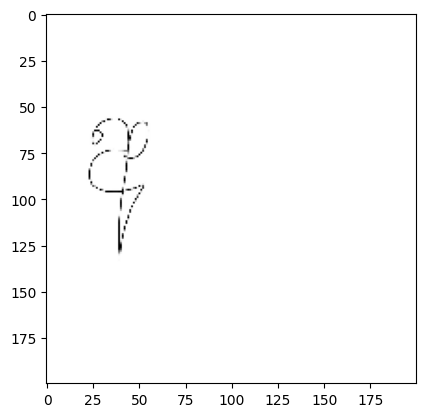

1/1 [==============================] - 0s 38ms/step
This is Letter 'අ' 


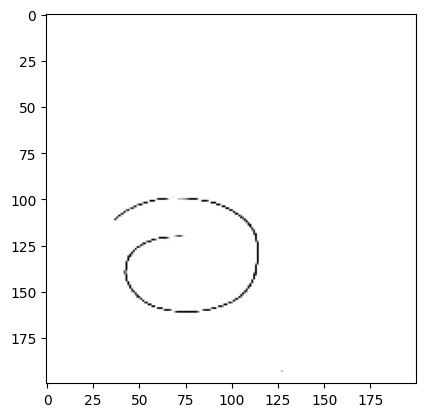

1/1 [==============================] - 0s 42ms/step
This is Letter 'ට'


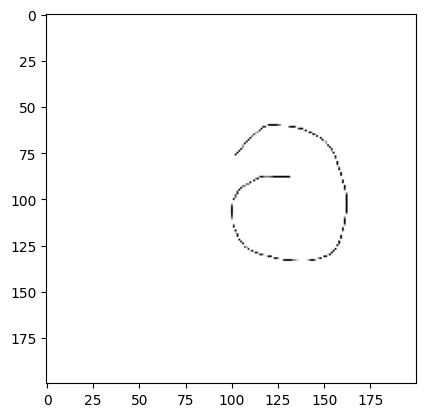

1/1 [==============================] - 0s 37ms/step
This is Letter 'ට'


In [142]:
dir_path = 'Letters_test/'

for i in os.listdir(dir_path):
  # Load the image
  img = image.load_img(os.path.join(dir_path, i) ,target_size=(200,200))
  # Display the image
  plt.imshow(img)
  plt.show()

# Convert the image to a NumPy array
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)

  if val == 0:
    print("This is Letter 'අ' ")
  else:
    print("This is Letter 'ට'")